In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('literacyaverages.xlsx')

In [4]:
df= df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      41365 non-null  object 
 1   ASBH02A                      41365 non-null  object 
 2   reading_avg                  41365 non-null  float64
 3   literary_purpose_avg         41365 non-null  float64
 4   informational_purpose_avg    41365 non-null  float64
 5   interpreting_process_avg     41365 non-null  float64
 6   straightforward_process_avg  41365 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.2+ MB


In [6]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

In [7]:
pivot_table = pd.pivot_table(df, values=averages, index=['Country', 'ASBH02A']).reset_index()

In [43]:
pivot_table

,Country,ASBH02A,informational_purpose_avg,interpreting_process_avg,literary_purpose_avg,reading_avg,straightforward_process_avg
0,Austria,No,498.657408,497.365857,503.520940,501.137730,503.331516
1,Austria,Yes,533.604588,533.534905,538.353546,535.753998,538.541325
2,Egypt,No,368.944815,376.185753,370.055159,368.778085,364.934062
3,Egypt,Yes,385.238053,382.455807,374.382017,381.017793,378.604022
4,France,No,491.164422,492.907004,494.816631,495.189771,495.147998
5,France,Yes,520.421201,518.050071,524.127303,522.368422,527.467670
6,Germany,No,493.821976,491.637327,503.782080,496.504230,496.581183
7,Germany,Yes,543.667811,543.658520,551.219226,545.941246,546.973033
8,Iran,No,415.629239,418.139679,435.488964,424.286114,429.671741
9,Iran,Yes,421.840284,420.598873,422.984017,422.865906,423.450890


In [45]:
pivot_table.to_excel('pivot_test.xlsx')

In [13]:
austria = pivot_table[pivot_table['Country']== 'Austria'].copy()

In [15]:
austria

,Country,ASBH02A,informational_purpose_avg,interpreting_process_avg,literary_purpose_avg,reading_avg,straightforward_process_avg
0,Austria,No,498.657408,497.365857,503.520940,501.137730,503.331516
1,Austria,Yes,533.604588,533.534905,538.353546,535.753998,538.541325


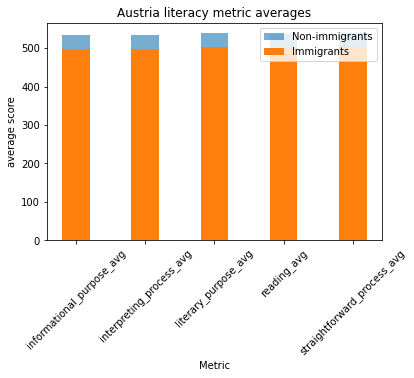

In [44]:
# Data
metrics =  ['informational_purpose_avg', 'interpreting_process_avg','literary_purpose_avg','reading_avg','straightforward_process_avg']
novalues = [498.657408,497.365857,503.520940,501.137730,503.331516]
yesvalues = [533.604588,533.534905,538.353546,535.753998,538.541325]

# Create bar chart
bar_width = 0.4
index = np.arange(len(metrics))

# Plot bars
plt.bar(index, yesvalues, bar_width, label='Non-immigrants', alpha=0.6)
plt.bar(index, novalues, bar_width, label='Immigrants')

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('average score')
plt.title('Austria literacy metric averages')
plt.xticks(index, metrics)
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()